# Accidentes de tránsito
## Exploración y análisis de probabilidades

### RafaCastle

Veamos primero el dataframe a grandes razgos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import datetime
import statistics as st
import seaborn as sns

In [2]:
df = pd.read_csv (r'transito.csv',low_memory=False)
df.head()

,id,fecha_evento,mes,hora,condicion,tipo_de_evento,punto_1,punto_2,colonia,alcaldia,...,ciclista_lesionado,pasajero_occiso,pasajero_lesionado,motociclista_occiso,motociclista_lesionado,conductor_occiso,conductor_lesionado,diagnostico_occiso,diagnostico_lesionado,origen
0,0,06/04/2020,abril,12:50,NaN,CHOQUE,EJE 7 SUR,ANTILLAS,PORTALES NTE,BENITO JUAREZ,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,POLICONTUNDIDO,RADIO
1,1,06/04/2020,abril,18:31,NaN,CHOQUE,CALZ DEL HUESO,RANCHO COLORADO,COAPA STA CECILIA,COYOACAN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,POLICONTUNDIDO,911 CDMX
2,2,06/04/2020,abril,18:39,NaN,CHOQUE,EJE 5 NTE,AV GRAN CANAL DEL DESAGUE,JOSE MA MORELOS Y PAVON,GUSTAVO A MADERO,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,HX BOCA,911 CDMX
3,3,06/04/2020,abril,11:38,NaN,DERRAPADO,EJE 10 SUR,AV SAN FCO,SAN FCO TLALTENCO,TLAHUAC,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,POLICONTUNDIDO,RADIO
4,4,06/04/2020,abril,13:31,NaN,DERRAPADO,AV HOMERO,SOFOCLES,LOS MORALES,MIGUEL HIDALGO,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,CX RODILLA IZQ,911 CDMX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51484 entries, 0 to 51483
Data columns (total 77 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          51484 non-null  int64  
 1   fecha_evento                                51484 non-null  object 
 2   mes                                         51484 non-null  object 
 3   hora                                        51484 non-null  object 
 4   condicion                                   35043 non-null  object 
 5   tipo_de_evento                              51484 non-null  object 
 6   punto_1                                     51484 non-null  object 
 7   punto_2                                     51484 non-null  object 
 8   colonia                                     51484 non-null  object 
 9   alcaldia                                    51484 non-null  object 
 10  tipo_de_in

# 1. Probabilidad de ocurrencia de eventos por colonia y por tipo de intersección

Primero la probabilidad por colonia

In [6]:
casos_por_colonia=df["colonia"].value_counts()
N=len(df)
probabilidad_de_casos_por_colonia=casos_por_colonia/N
df_colonia=pd.DataFrame(probabilidad_de_casos_por_colonia)
df_colonia.rename(columns={"colonia":"Prob. por colonia"})

,Prob. por colonia
CENTRO,0.032379
MORELOS,0.010974
DOCTORES,0.010644
AGRICOLA ORIENTAL,0.010586
JUAREZ,0.010061
...,...
LA FORESTAL 1,0.000019
DEPORTIVO C E T,0.000019
STA CRUZ DE GUADALUPE,0.000019
PRADO COAPA 2DA SECC,0.000019


In [7]:
sum(probabilidad_de_casos_por_colonia) #verificando que sumen 1

1.000000000000025

Ahora la probabilidad por tipo de intersección

In [8]:
casos_por_tipo_de_intersección=df["tipo_de_interseccion"].value_counts()
probabilidad_de_casos_por_tipo_de_intersección=casos_por_tipo_de_intersección/N
df_interseccion=pd.DataFrame(probabilidad_de_casos_por_tipo_de_intersección)
df_interseccion.rename(columns={"tipo_de_interseccion":"Prob. por interseccion"},inplace=True)
df_interseccion

,Prob. por interseccion
CRUZ,0.511984
T,0.351643
Y,0.042130
RAMAS MULTIPLES,0.035778
RECTA,0.031136
GLORIETA,0.011013
DESNIVEL,0.010197
GAZA,0.004642
CURVA,0.001476


In [9]:
sum(probabilidad_de_casos_por_tipo_de_intersección) #verificando que sumen 1

0.9999999999999999

## Gráfica - Probabilidad por alcaldía

Se muestran las probabilidades por alcaldía en una gráfica tipo tarta ya que las colinias son demasiadas para graficarlas

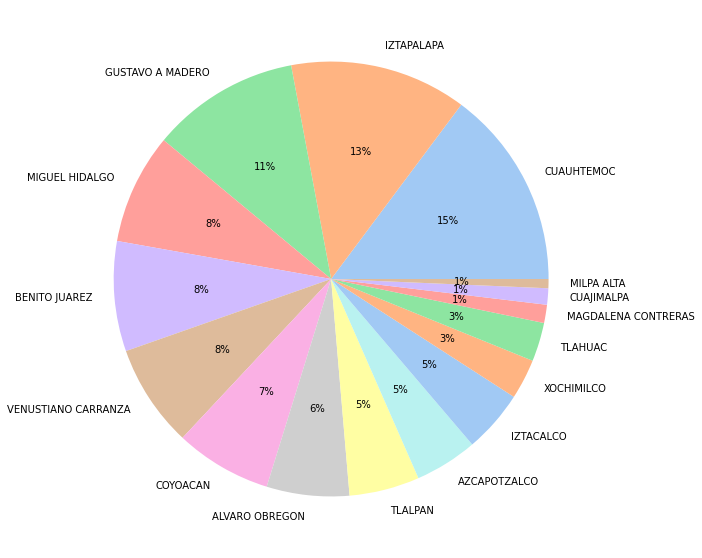

In [10]:
plt.figure(figsize=(20, 10))
casos_por_alcaldia=df["alcaldia"].value_counts()
probabilidad_de_casos_por_alcaldia=casos_por_alcaldia/N
df_alcaldia=pd.DataFrame(probabilidad_de_casos_por_alcaldia)
plot1=df_alcaldia.reset_index().rename(columns={"index":"Alcaldía","alcaldia":"Prob. por alcaldia"})
colors = sns.color_palette('pastel')[0:10]
plt.pie(plot1["Prob. por alcaldia"], labels = plot1["Alcaldía"], colors = colors, autopct='%.0f%%')
plt.show()

## Gráfica - Probabilidad por tipo de intersección

La mayoría de eventos ocurren en las intersecciones tipo cruz.

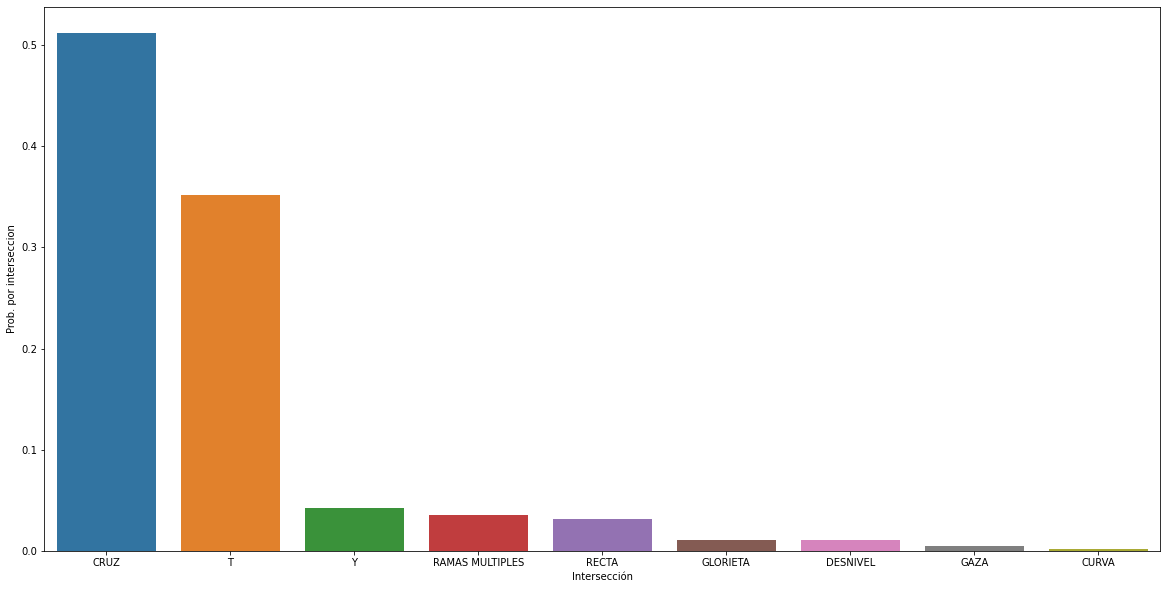

In [11]:
plt.figure(figsize=(20, 10))
plot2=df_interseccion.reset_index().rename(columns={"index":"Intersección"})
sns.barplot(x="Intersección",y="Prob. por interseccion",data=plot2);

# 2. Probabilidad conjunta por tipo de intersección y vehículo

Para resolver este problema demostraremos que los eventos son dependientes: 

Sea 

A = Que un evento se de en un tipo de vehículo    y    B = Que un evento se de en un tipo de intersección
    
A y B son dependientes si

$$
P(A|B) \neq P(A) \hspace{1cm} P(B|A) \neq P(B)
$$

Obtengamos entonces la probabilidad de los eventos para los distintos tipos de vehículos e intersecciones

In [17]:
freq_tipo_vehiculo_1=list(df[['tipo_de_vehiculo_1']].values)
freq_tipo_vehiculo_2=list(df[['tipo_de_vehiculo_2']].values)
freq_tipo_vehiculo_3=list(df[['tipo_de_vehiculo_3']].values)
freq_tipo_vehiculo_4=list(df[['tipo_de_vehiculo_4']].values)
freq_tipo_vehiculo=freq_tipo_vehiculo_1+freq_tipo_vehiculo_2+freq_tipo_vehiculo_3+freq_tipo_vehiculo_4
freq_tipo_vehiculo_total=pd.DataFrame(freq_tipo_vehiculo,columns=["tipo de vehiculo"])
casos_por_tipo_de_vehiculo=freq_tipo_vehiculo_total.value_counts()
N_v=sum(casos_por_tipo_de_vehiculo)
prob_tipo_vehiculo=pd.DataFrame(freq_tipo_vehiculo_total.value_counts()/N_v,columns=["probabilidad"])
prob_tipo_vehiculo["eventos"]=pd.DataFrame(freq_tipo_vehiculo_total.value_counts())
prob_tipo_vehiculo

,probabilidad,eventos
tipo de vehiculo,,
AUTOMOVIL,0.395836,31729
MOTOCICLETA,0.303517,24329
SD,0.089998,7214
TAXI,0.054219,4346
BICICLETA,0.040508,3247
CAMION DE CARGA,0.034407,2758
AUTOBUS DE PASAJEROS,0.022967,1841
OBJETO FIJO,0.018788,1506
MICROBUS,0.017803,1427


In [18]:
prob_tipo_int=pd.DataFrame(df['tipo_de_interseccion'].value_counts()/len(df))
prob_tipo_int.rename(columns={'tipo_de_interseccion':"probabilidad"},inplace=True)
freq_tipo_int=df['tipo_de_interseccion']
prob_tipo_int["eventos"]=pd.DataFrame(freq_tipo_int.value_counts())
prob_tipo_int.index.name="tipo de intersección"
prob_tipo_int

,probabilidad,eventos
tipo de intersección,,
CRUZ,0.511984,26359
T,0.351643,18104
Y,0.042130,2169
RAMAS MULTIPLES,0.035778,1842
RECTA,0.031136,1603
GLORIETA,0.011013,567
DESNIVEL,0.010197,525
GAZA,0.004642,239
CURVA,0.001476,76


Ahora obtengamos la cantidad de eventos que se dan por cada intersección-vehículo

In [19]:
freq_tipo_vehiculo_1=list(df[['tipo_de_vehiculo_1','tipo_de_interseccion']].values)
freq_tipo_vehiculo_2=list(df[['tipo_de_vehiculo_2','tipo_de_interseccion']].values)
freq_tipo_vehiculo_3=list(df[['tipo_de_vehiculo_3','tipo_de_interseccion']].values)
freq_tipo_vehiculo_4=list(df[['tipo_de_vehiculo_4','tipo_de_interseccion']].values)
freq_tipo_vehiculo=freq_tipo_vehiculo_1+freq_tipo_vehiculo_2+freq_tipo_vehiculo_3+freq_tipo_vehiculo_4
freq_tipo_vehiculo=pd.DataFrame(freq_tipo_vehiculo,columns=["tipo de vehiculo","tipo de interseccion"])
freq_tipo_vehiculo_count=freq_tipo_vehiculo.groupby(['tipo de vehiculo','tipo de interseccion']).size().reset_index().rename(columns={0:'eventos'}).sort_values('eventos',ascending=False)
N_i_v=sum(freq_tipo_vehiculo_count["eventos"])
freq_tipo_vehiculo_count["probabilidad conjunta"]=freq_tipo_vehiculo_count["eventos"]/N_i_v
freq_tipo_vehiculo_count

,tipo de vehiculo,tipo de interseccion,eventos,probabilidad conjunta
9,AUTOMOVIL,CRUZ,16964,0.211635
68,MOTOCICLETA,CRUZ,12371,0.154335
16,AUTOMOVIL,T,10509,0.131105
75,MOTOCICLETA,T,8605,0.107352
86,SD,CRUZ,3644,0.045461
...,...,...,...,...
109,TREN SUBURBANO,T,1,0.000012
45,FERROCARRIL,RECTA,1,0.000012
111,TROLEBUS,DESNIVEL,1,0.000012
112,TROLEBUS,GLORIETA,1,0.000012


Notemos entonces que la probabilidad de un evento al ir en automovil (por tomar un contraejemplo) es $P(A) = 0.395836$, obtengamos ahora

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

Y consideremos a $B$ una intersección tipo cruz, entonces, como se muestra en las tablas de arriba $P(B) = 0.511984$ y $P(A \cap B) = 0.211635$, así se tiene:

$$
P(A|B) = \frac{0.211635}{0.511984} = 0.413362 \neq P(A)
$$

análogamente para $P(B)$

$$
P(B|A) = \frac{0.211635}{0.395836} = 0.534653 \neq P(B)
$$

Por lo que los eventos son dependientes.

In [20]:
sum(freq_tipo_vehiculo_count["probabilidad conjunta"]) #verificando que sumen 1

0.9999999999999994

# 3. Probabilidad de ocurrencia en la semana del 10 de mayo

Primero se formatea la columna fecha_evento para poder trabajar con fechas

In [21]:
fechas_formateadas=[]
for fecha in df["fecha_evento"]:
    datestring = fecha
    d = datetime.datetime.strptime(datestring ,'%d/%m/%Y')
    fechas_formateadas.append(d)
df["fechas formateadas"]=fechas_formateadas

Ahora se obtiene la probabilidad de que ocurra un accidente para cada fecha

In [22]:
casos_por_dia=df["fechas formateadas"].value_counts()
probabilidad_de_casos_por_dia=casos_por_dia/N
df_dia=pd.DataFrame(probabilidad_de_casos_por_dia)
df_dia.rename(columns={"fechas formateadas":"Prob. por dia"})

,Prob. por dia
2018-08-18,0.001806
2019-12-06,0.001670
2018-10-19,0.001573
2018-08-03,0.001573
2018-12-07,0.001554
...,...
2018-05-08,0.000311
2018-05-11,0.000272
2020-06-09,0.000272
2018-05-09,0.000175


In [23]:
sum(probabilidad_de_casos_por_dia) # verificando que sumen 1

1.0000000000000018

A continuación se calcula la probabilidad de que se de un accidente en la semana que incluye al 10 de mayo. Para esto primero se evalúa si el día está en la semana  del 10 de mayo, luego se suman las probabilidades de los días que sí están en dicha semana.

In [24]:
fechas_en_10_de_mayo=[]
probabilidad_semana_10_de_mayo=0
for fecha in df_dia.index:
# La siguiente línea ve si el día está en la semana del 10 de mayo
    if fecha.isocalendar()[1] == datetime.datetime.strptime("10/5/"+fecha.strftime('%Y'),'%d/%m/%Y').isocalendar()[1]: 
        fechas_en_10_de_mayo.append(str(fecha)[:10])
        probabilidad_semana_10_de_mayo+=df_dia.loc[str(fecha)[:10],"fechas formateadas"][0] #se suman las probabilidades

Estas son las fechas donde se dan accidentes que están en una semana que incluye al 10 de mayo

In [25]:
fechas_en_10_de_mayo

['2019-05-09',
 '2019-05-07',
 '2019-05-12',
 '2019-05-06',
 '2019-05-08',
 '2019-05-11',
 '2019-05-10',
 '2020-05-07',
 '2020-05-04',
 '2020-05-05',
 '2020-05-09',
 '2018-05-12',
 '2018-05-13',
 '2020-05-10',
 '2020-05-08',
 '2020-05-06',
 '2018-05-10',
 '2018-05-08',
 '2018-05-11',
 '2018-05-09',
 '2018-05-07']

La probabilidad de que se de un accidente en la semana del 10 de mayo es de $1.204\%$ como se muestra en la siguiente celda

In [26]:
probabilidad_semana_10_de_mayo

0.012042576334395153

# 4. Probabilidad de ocurrencia de un evento de acuerdo a la hora

Se obtendrá la probabilidad de ocurrencia tener un accidente de bicicleta de acuerdo a la hora.

Para esto se obtendrá primero la probabilidad de que haya un accidente de acuerdo a la hora

In [27]:
#Limpieza de datos de hora, lanza una advertencia pero no pasa nada
tiempo=[]
df["hora"][27604]="18:43";
df["hora"][33309]="19:17";
for i in range(len(df["hora"])):
    if df["hora"][i]=="SD":
        pass
    else:
        tiempo.append([pd.Timestamp(df["hora"][i]),pd.Timestamp(df["hora"][i])]);

<ipython-input-27-a00c62275723>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hora"][27604]="18:43";
<ipython-input-27-a00c62275723>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hora"][33309]="19:17";


Obteniendo la probabilidad de que haya un accidente por hora

In [28]:
df1 = pd.DataFrame(tiempo,  columns=["Prob. de un accidente","Index"]);
df1.set_index("Index",inplace=True);
probabilidad_por_hora=df1.groupby(pd.Grouper(freq='1H')).count()/N
probabilidad_por_hora=probabilidad_por_hora.rename_axis(None)
probabilidad_por_hora
#No hacerle caso a la fecha que sale antes de la hora

,Prob. de un accidente
2021-10-09 00:00:00,0.026435
2021-10-09 01:00:00,0.025833
2021-10-09 02:00:00,0.019734
2021-10-09 03:00:00,0.018433
2021-10-09 04:00:00,0.017675
2021-10-09 05:00:00,0.020861
2021-10-09 06:00:00,0.027135
2021-10-09 07:00:00,0.042945
2021-10-09 08:00:00,0.062835
2021-10-09 09:00:00,0.060135


In [29]:
sum(probabilidad_por_hora["Prob. de un accidente"]) # Verificando que sume 1

0.9998251884080491

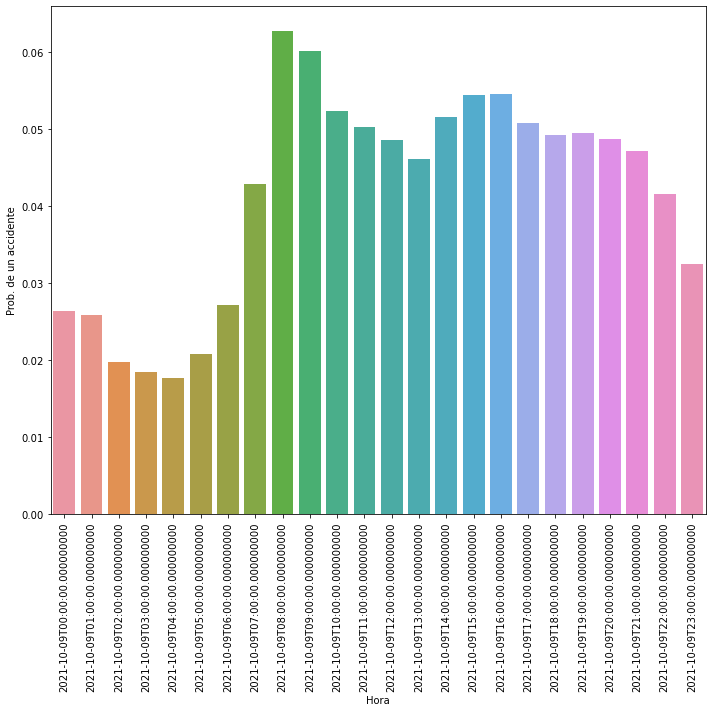

In [30]:
plt.figure(figsize=(10, 10))
plot3=probabilidad_por_hora.reset_index().rename(columns={"index":"Hora"})
sns.barplot(x="Hora",y="Prob. de un accidente",data=plot3);
plt.xticks(rotation=90)
plt.tight_layout()

# 5. Puntos y horarios de mayor vigilancia

Veamos en que cruces de la ciudad se da la mayor cantidad de eventos

In [31]:
casos_por_punto=df[["punto_1","punto_2"]].value_counts()
casos_por_punto=pd.DataFrame(casos_por_punto)
casos_por_punto=casos_por_punto.reset_index()
casos_por_punto.rename(columns={0:"Eventos"})

,punto_1,punto_2,Eventos
0,ANILLO PERIFERICO,EJE 5 SUR,72
1,ANILLO PERIFERICO,CANAL DE CHALCO,52
2,AV INSURGENTES,EJE 2 NTE,51
3,AV INSURGENTES,CALZ TICOMAN,49
4,ANILLO PERIFERICO,AV INSURGENTES,46
...,...,...,...
25148,CHIMALPOPOCA,DIAGONAL 20 DE NOVIEMDRE,1
25149,CHIMALPOPOCA,DR PASCUA,1
25150,CHIMALPOPOCA,LOS REYES,1
25151,CHIMALPOPOCA,LUCAS ALAMAN,1


Ahora para saber dónde hay que poner vigilancia debemos escoger los lugares que presenten más accidentes, por ejemplo, podemos proponernos poner vigilancia en los lugares donde ha hubo más de $N$ accidentes. La siguiente celda encuentra la cantidad de lugares donde hubo más de $N$ accidentes, para el caso de ejemplo escogí $N=10$. 

Recomiendo no escoger un número muy pequeño ya que algunas de las próximas celdas pueden tardar mucho en correr

In [32]:
#Encuentra el índice donde los accidentes empiezan a ser menores que N_ac
N_ac=10
for i in range(len(casos_por_punto)):
    if casos_por_punto.iloc[i][0]==N_ac:
        print(i)
        indice=i
        break

507


Entonces hay $507$ cruces donde ocurrieron más de 10 accidentes, la siguiente celda va a encontrar exactamente los accidentes que ocurrieron en cada uno de esos cruces y va a guardar los DataFrames en una lista

In [33]:
# Forma una lista de DataFrames que tiene la hora y los puntos
df["hora"][27604]="18:43";
df["hora"][33309]="19:17";
#Eso solo era para limpiar los datos, lanza una advertencia pero no pasa nada
lista_de_dataframes=[]
for caso in range(indice):
    lista_de_dataframes.append(df[["hora","punto_1","punto_2"]][(df["punto_1"]==casos_por_punto.loc[caso,"punto_1"]) & (df["punto_2"]==casos_por_punto.loc[caso,"punto_2"])])

<ipython-input-33-5afb6cfa3962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hora"][27604]="18:43";
<ipython-input-33-5afb6cfa3962>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hora"][33309]="19:17";


Para aclarar, la lista "lista_de_dataframes" contiene los DataFrames de cada uno de los cruces con la hora a la que ocurrió, la columna "hora formateada" solo está para simplificar los cálculos. muestro en la siguiente celda el primer elemento de dicha lista, que sería el DataFrame que contiene todos los choques que se dieron en periférico y eje 5:

In [34]:
lista_de_dataframes[0]

,hora,punto_1,punto_2
1164,22:40,ANILLO PERIFERICO,EJE 5 SUR
1281,22:08,ANILLO PERIFERICO,EJE 5 SUR
1380,17:06,ANILLO PERIFERICO,EJE 5 SUR
2619,04:05,ANILLO PERIFERICO,EJE 5 SUR
3105,10:27,ANILLO PERIFERICO,EJE 5 SUR
...,...,...,...
46382,08:32,ANILLO PERIFERICO,EJE 5 SUR
47104,10:45,ANILLO PERIFERICO,EJE 5 SUR
47188,07:35,ANILLO PERIFERICO,EJE 5 SUR
47234,08:27,ANILLO PERIFERICO,EJE 5 SUR


La siguiente celda va a segmentar el DataFrame anterior (junto con todos los demás en "lista_de_dataframes") en lapsos de 2 horas y va a ver en que lapso se da la mayor cantidad de accidentes

In [35]:
intervalo_de_vigilancia=[]
for i in range(indice):
    hora_formateada=[]
    for hora in range(len(lista_de_dataframes[i])):
        if lista_de_dataframes[i]["hora"].values[hora] != "SD":
            hora_formateada.append(pd.Timestamp(lista_de_dataframes[i]["hora"].values[hora]))
        else:
            hora_formateada.append(np.nan)
    lista_de_dataframes[i]["hora formateada"] = hora_formateada
    #esta línea se va a mostrar en la siguiente celda
    a=lista_de_dataframes[i].set_index("hora formateada").groupby(pd.Grouper(freq='2H')).count().rename_axis(None)[["hora"]].rename(columns={"hora":"casos"})[["casos"]]
    intervalo_de_vigilancia.append(str(a.idxmax()[0])[-8:-3] + " - " + str(a.idxmax()[0]+datetime.timedelta(hours = 2))[-8:-3])

A continuación se muestra un ejemplo de lo que hizo la celda para cada uno de los DataFrames en "lista_de_dataframes", esta es la agrupación por horas del DataFrame que contiene todos los choques que se dieron en periférico y eje 5:

In [36]:
lista_de_dataframes[0].set_index("hora formateada").groupby(pd.Grouper(freq='2H')).count().rename_axis(None)[["hora"]].rename(columns={"hora":"casos"})[["casos"]]

,casos
2021-10-09 00:00:00,1
2021-10-09 02:00:00,3
2021-10-09 04:00:00,4
2021-10-09 06:00:00,6
2021-10-09 08:00:00,7
2021-10-09 10:00:00,9
2021-10-09 12:00:00,12
2021-10-09 14:00:00,5
2021-10-09 16:00:00,5
2021-10-09 18:00:00,8


Es claro que la mayor cantidad de choques se dió en el lapso de 12:00 a 13:59.

A continuación muestro el DataFrame que sintetiza todos los cálculos:

In [37]:
vigilancia_eventos=casos_por_punto[:indice]
vigilancia_eventos["Horario de Vigilancia"]=pd.DataFrame(intervalo_de_vigilancia)
vigilancia_eventos.rename(columns={"punto_1":"Punto 1","punto_2":"Punto 2",0:"Eventos"})
#no hacerle caso a la advertencia

<ipython-input-37-1a2ad31a431d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vigilancia_eventos["Horario de Vigilancia"]=pd.DataFrame(intervalo_de_vigilancia)


,Punto 1,Punto 2,Eventos,Horario de Vigilancia
0,ANILLO PERIFERICO,EJE 5 SUR,72,12:00 - 14:00
1,ANILLO PERIFERICO,CANAL DE CHALCO,52,06:00 - 08:00
2,AV INSURGENTES,EJE 2 NTE,51,18:00 - 20:00
3,AV INSURGENTES,CALZ TICOMAN,49,08:00 - 10:00
4,ANILLO PERIFERICO,AV INSURGENTES,46,00:00 - 02:00
...,...,...,...,...
502,EJE CENTRAL,JUPITER,11,08:00 - 10:00
503,AV FRAY SERVANDO T DE MIER,SUR 103,11,08:00 - 10:00
504,CALZ DE TLALPAN,AV INSURGENTES,11,18:00 - 20:00
505,AV TEZOZOMOC,EJE 3 NTE,11,08:00 - 10:00
